<a href="https://colab.research.google.com/github/kirti-cs/Data_Science/blob/main/PadhAI_Visualization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as  pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes= True)

# Plotting the Composition of Data

## Static Composition

### Pie Chart

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
c= p.groupby('species')['species'].count()

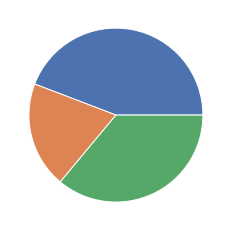

In [ ]:
plt.pie(c);
plt.show()

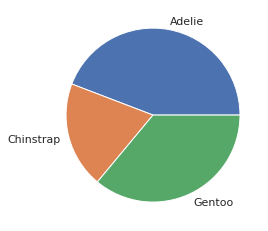

In [ ]:
plt.pie(c, labels= c.index);
plt.show()

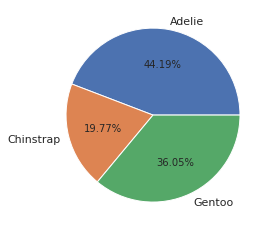

In [ ]:
plt.pie(c, labels= c.index, autopct= "%.2f%%");
plt.show()

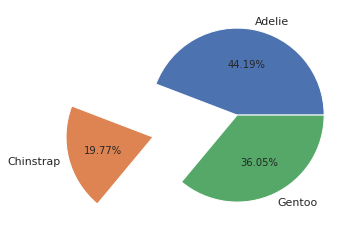

In [ ]:
plt.pie(c, labels= c.index, autopct= "%.2f%%", explode= [0, 1, 0]);
plt.show()

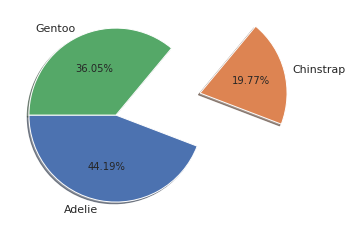

In [ ]:
plt.pie(c, labels= c.index, autopct= "%.2f%%", explode= [0, 1, 0], startangle= 180, shadow= True);
plt.show()

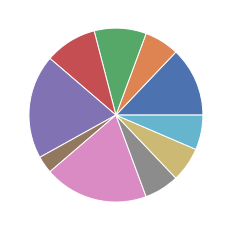

In [ ]:
#pie charts are difficult to read
plt.pie(np.random.randint(0, 10, 10));
plt.show()

### Donut Chart

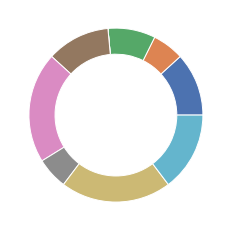

In [ ]:
plt.pie(np.random.randint(0, 10, 10), wedgeprops= dict(width= 0.3));
#wedgeprops is properties of wedges
plt.show()
#Donut charts tells that it's the angle than area that tell about a variable

In [ ]:
#check "colormap matplotlib"
cmap = plt.get_cmap('Set1')
my_colors = cmap(np.arange(10))

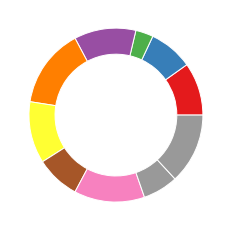

In [ ]:
plt.pie(np.random.randint(0, 10, 10), wedgeprops= dict(width= 0.3), colors= my_colors);
plt.show()

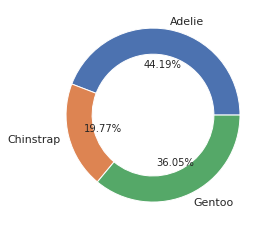

In [ ]:
plt.pie(c, labels= c.index, autopct= "%.2f%%", wedgeprops=dict(width= 0.3));
plt.show()

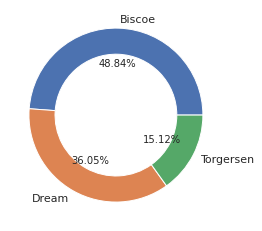

In [ ]:
c_i = p.groupby('island')['island'].count()
plt.pie(c_i, labels= c_i.index, autopct= "%.2f%%", wedgeprops=dict(width= 0.3));
plt.show()

In [ ]:
pd.crosstab(p.species, p.island)
#It will give df as count of different species with islands 

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [ ]:
c = pd.crosstab(p.species, p.island)
c = c.T

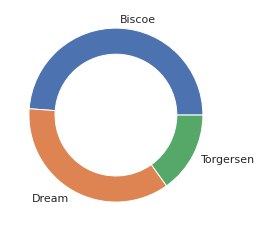

In [ ]:
plt.pie(c.sum(axis=1), labels= c.index, radius= 1, wedgeprops=dict(width= 0.3));
plt.show()

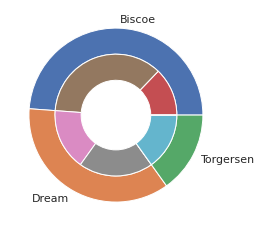

In [ ]:
plt.pie(c.sum(axis=1), labels= c.index, radius= 1, wedgeprops=dict(width= 0.3));
plt.pie(c.values.flatten(), radius = 0.7, wedgeprops= dict(width= 0.3));
#radius = 1 - 0.3 = 0.7
plt.show()
#inner plot is showing species

In [ ]:
#fixing colors of above donut chart
cmap= plt.get_cmap('tab20c')
outer_color = cmap(np.array([0, 4, 8]))   #taking the darker shades outside
inner_color = cmap(np.array([1, 2,3, 5, 6, 7, 9, 10, 11]))      #Taking the lighter shades inside

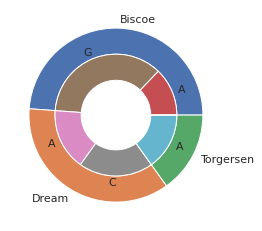

In [ ]:
plt.pie(c.sum(axis=1), labels= c.index, radius= 1, wedgeprops=dict(width= 0.3));
plt.pie(c.values.flatten(), labels= ["A", " ", "G", "A", "C", " ", "A", " ", " ",], radius = 0.7, wedgeprops= dict(width= 0.3));
#We give inside labels manually, which is not a good approach
plt.show()

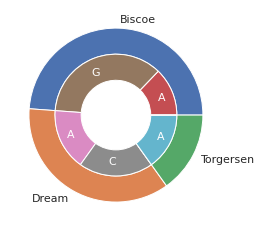

In [ ]:
plt.pie(c.sum(axis=1), labels= c.index, radius= 1, wedgeprops=dict(width= 0.3));
plt.pie(c.values.flatten(), labels= ["A", " ", "G", "A", "C", " ", "A", " ", " ",], radius = 0.7, wedgeprops= dict(width= 0.3), 
        labeldistance= 0.75, textprops= dict(color='w'));

### Stacked Bar Plot

In [ ]:
import urllib.request
import json

In [ ]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df_ = df.tail(3)           #looking for last three days
df_.drop(['date', 'dateymd'], axis= 1, inplace= True)     #we don't want date
df_.set_index('status', inplace= True)             #we only want the status
df_ = df_.T                                       #putting status as column
df_ = df_.apply(pd.to_numeric)                    #Convert it to int (initially it was objects)
df_.drop('tt', inplace= True)                    #Removing tt(total columns)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,1,0,0
ap,909,1543,13
ar,165,249,0
as,758,1014,10
br,14,42,0


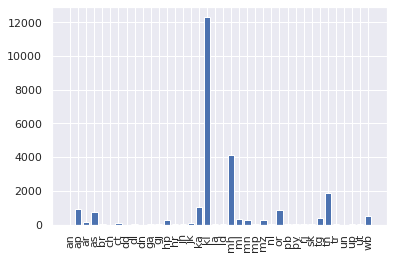

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation= 90);

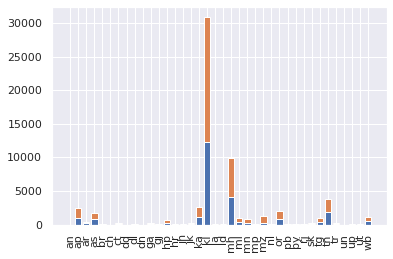

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed);
plt.xticks(rotation= 90);

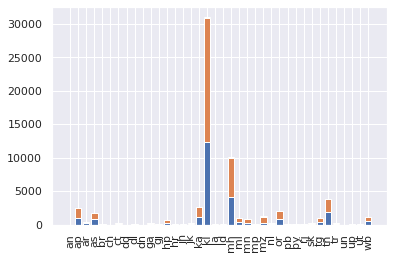

In [ ]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered);  #deceased are very low, not visible in graph
plt.xticks(rotation= 90);

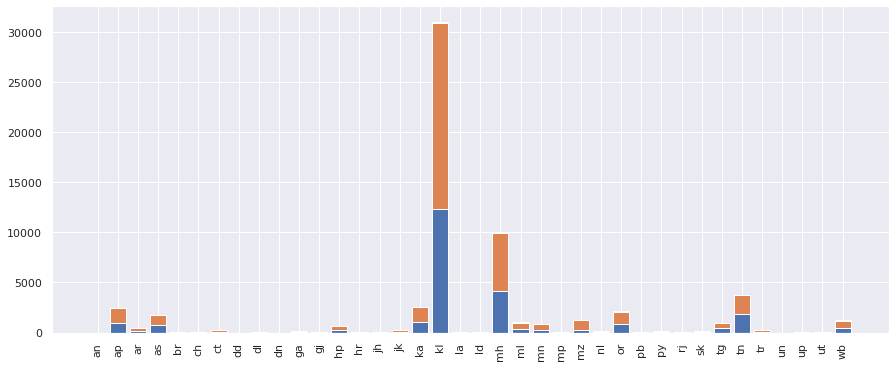

In [ ]:
#the above plot is very conjusted, so increasing its size
fig= plt.gcf();             #It only returns the fig (than in subplots)
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered);
plt.xticks(rotation= 90);

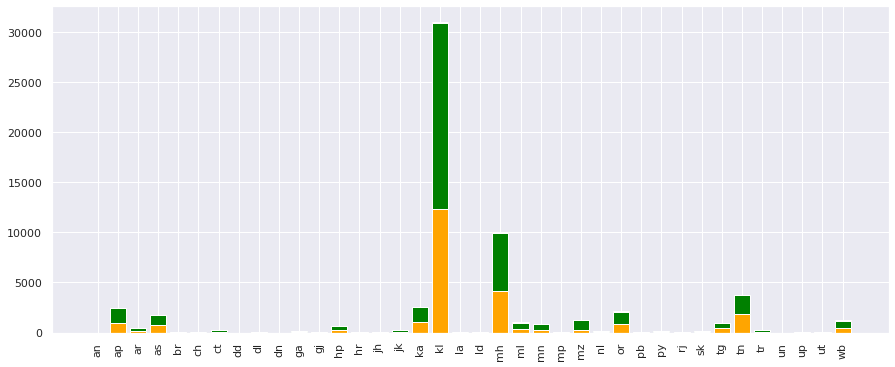

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color= 'Green');
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered, color= 'Red');
plt.xticks(rotation= 90);

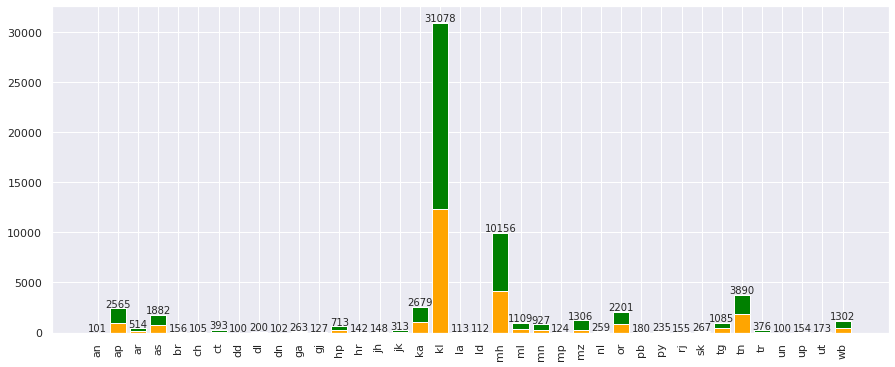

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color= 'Green');
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered, color= 'Red');
plt.xticks(rotation= 90);

for i, val in enumerate(df_.index):
    #i is num, and val is state name
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha='center');   #ha = horizontal alignment

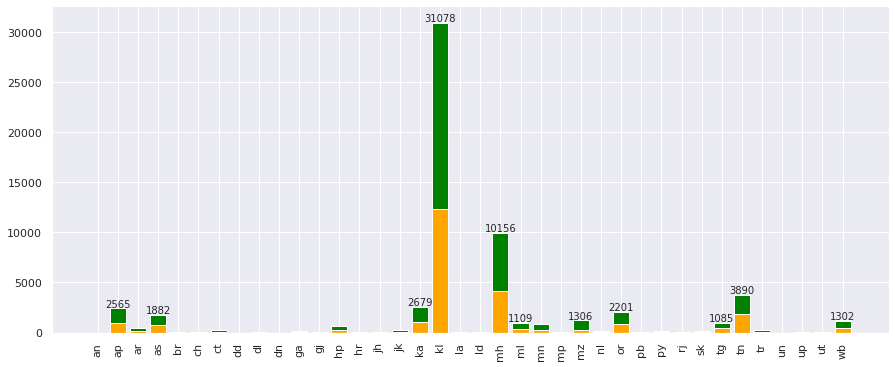

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color= 'Green');
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered, color= 'Red');
plt.xticks(rotation= 90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha='center');   

### Relative Stacked Bar Plot

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,1,0,0
ap,909,1543,13
ar,165,249,0
as,758,1014,10
br,14,42,0


In [ ]:
df_['Total'] = 0
df_['Total'] = df_.sum(axis=1)
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,1,0,0,1
ap,909,1543,13,2465
ar,165,249,0,414
as,758,1014,10,1782
br,14,42,0,56


In [ ]:
df_['ConfirmedFraction'] = df_['Confirmed'] /  df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] /  df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] /  df_['Total']
df_.head()

status,Confirmed,Recovered,Deceased,Total,RecoveredFraction,DeceasedFraction,ConfirmedFraction
an,1,0,0,1,0.000000,0.000000,1.000000
ap,909,1543,13,2465,0.625963,0.005274,0.368763
ar,165,249,0,414,0.601449,0.000000,0.398551
as,758,1014,10,1782,0.569024,0.005612,0.425365
br,14,42,0,56,0.750000,0.000000,0.250000


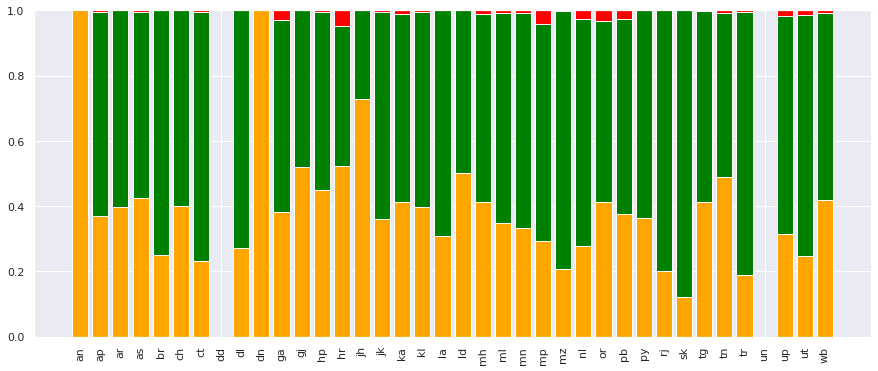

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom= df_.ConfirmedFraction, color= 'Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom= df_.ConfirmedFraction + df_.RecoveredFraction, color= 'Red');
plt.xticks(rotation= 90);

In [ ]:
df_ = df_.sort_values("ConfirmedFraction", ascending= False)

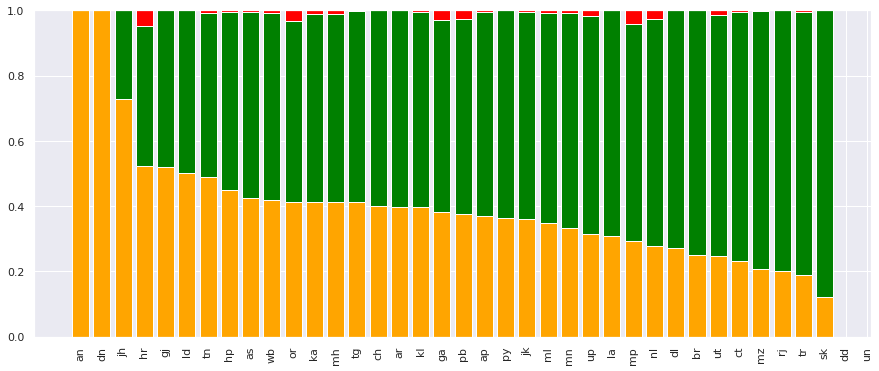

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom= df_.ConfirmedFraction, color= 'Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom= df_.ConfirmedFraction + df_.RecoveredFraction, color= 'Red');
plt.xticks(rotation= 90);

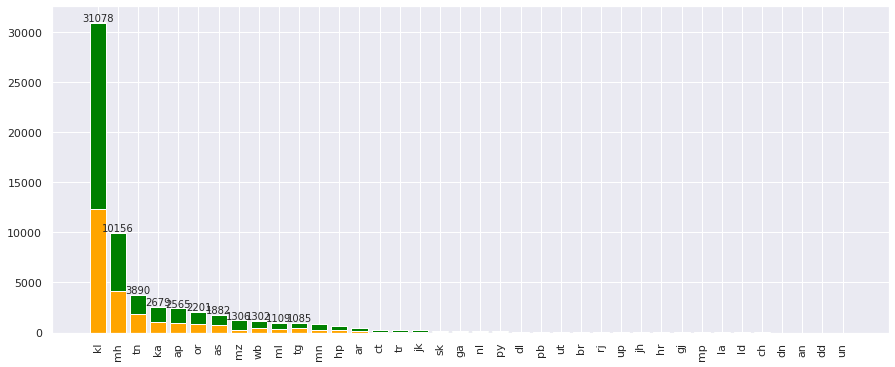

In [ ]:
df_ = df_.sort_values('Total', ascending= False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color= 'Green');
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed + df_.Recovered, color= 'Red');
plt.xticks(rotation= 90);

for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha='center');   

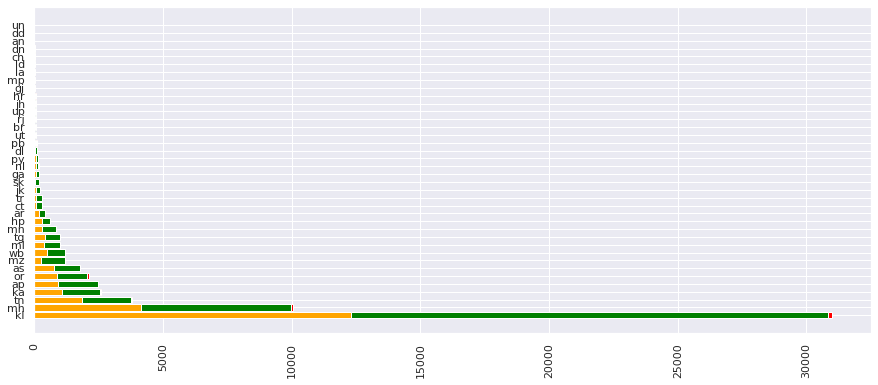

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left= df_.Confirmed, color= 'Green');
plt.barh(df_.index, df_.Deceased, left= df_.Confirmed + df_.Recovered, color= 'Red');
plt.xticks(rotation= 90);
#to get the horizontal bar plots

## Time-varing Composition of Data

### Pivot Table

In [ ]:
df.head()
#Looking at the whole data

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df_ = df[['kl', 'date', 'status']]        #using "kl" as "mh" as negative values too in it
df_.head()

,kl,date,status
0,19,14-Mar-20,Confirmed
1,3,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,5,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [ ]:
df_['kl'] = pd.to_numeric(df_['kl'])
df_['date'] = pd.to_datetime(df_['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_.head()

,kl,date,status
0,19,2020-03-14,Confirmed
1,3,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,5,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


date  |  confirmed  |  recovered  |  deceased  |

2020-03-14  |  14  |  1       |   2

**PIVOT TABLES**

A pivot table is a table of grouped values that aggregates the individual items of a more extensive table within one or more discrete categories.

In [ ]:
#reshaping data
df_ = df_.pivot_table(values= 'kl', columns= 'status', index= 'date')
#columns are unique values in 'status'

In [ ]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,19,0,3
2020-03-15,5,0,0
2020-03-16,3,0,0
2020-03-17,0,0,0
2020-03-18,0,0,0


### Stacked Area Plot

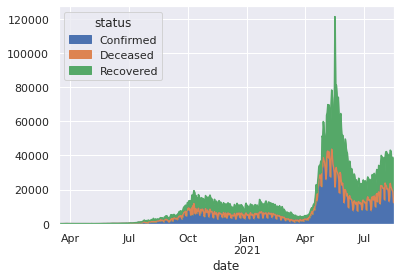

In [ ]:
df_.plot.area()
#Pandas way of plotting

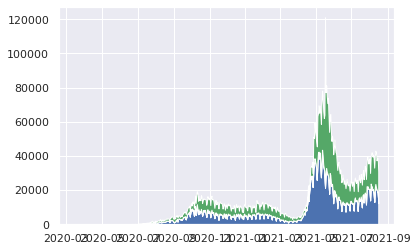

In [ ]:
plt.stackplot(df_.index, df_.Confirmed, df_.Deceased, df_.Recovered);
#MatplotLib version of above plot

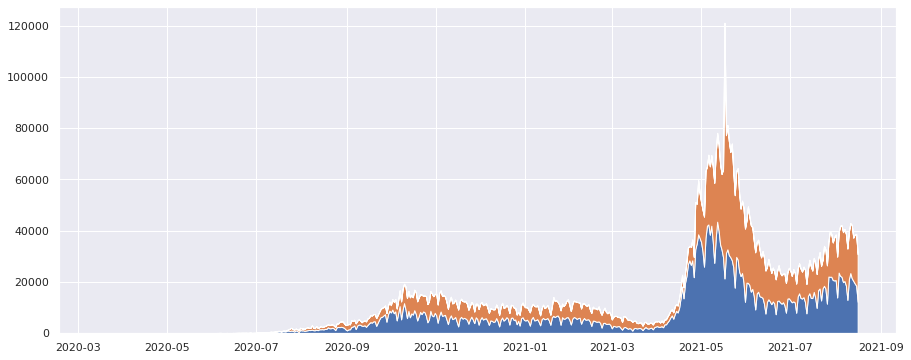

In [ ]:
#Making above plot readable
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

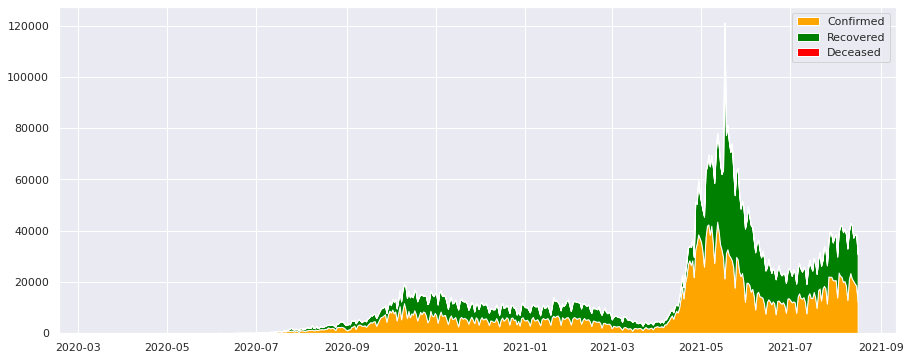

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels= ['Confirmed', 'Recovered', 'Deceased'],
              colors= ['orange', 'green', 'red']);
plt.legend();

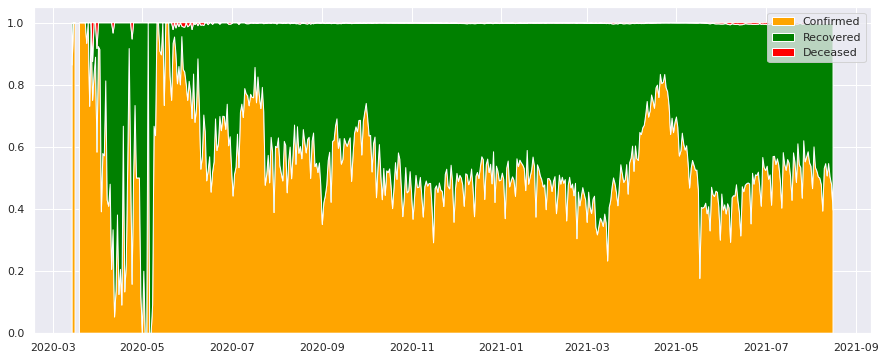

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1),
              labels= ['Confirmed', 'Recovered', 'Deceased'],
              colors= ['orange', 'green', 'red']);
plt.legend();

In [ ]:
def plot_stack_area_by_state(state):
    df_ = df[[state, 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values= state, columns= 'status', index= 'date')

    fig = plt.gcf();
    fig.set_size_inches(15,6);
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1),
                    labels= ['Confirmed', 'Recovered', 'Deceased'],
                    colors= ['orange', 'green', 'red']);
    plt.legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


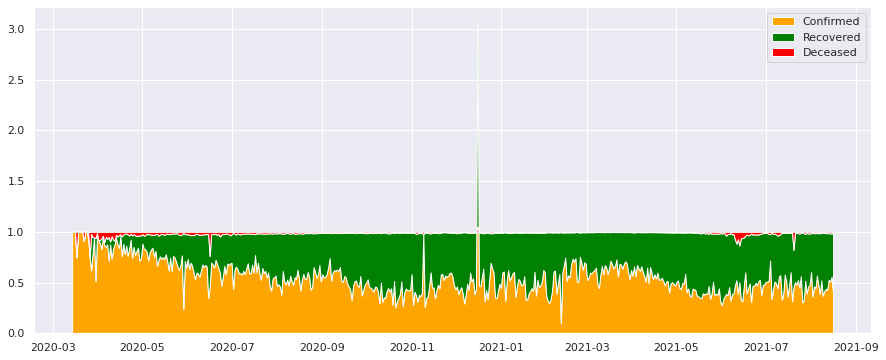

In [ ]:
plot_stack_area_by_state('mh')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


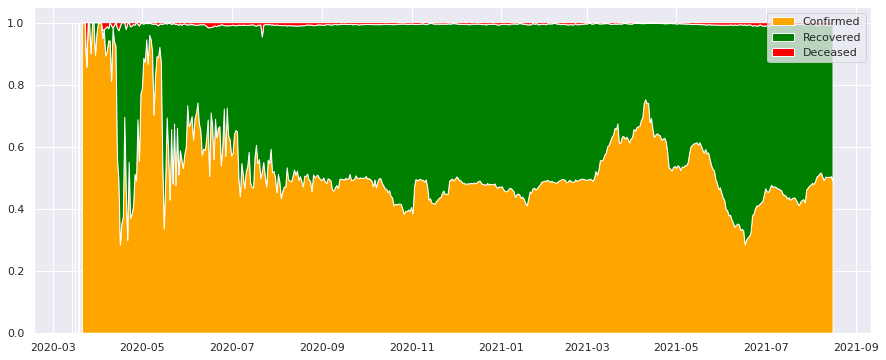

In [ ]:
plot_stack_area_by_state('tn');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


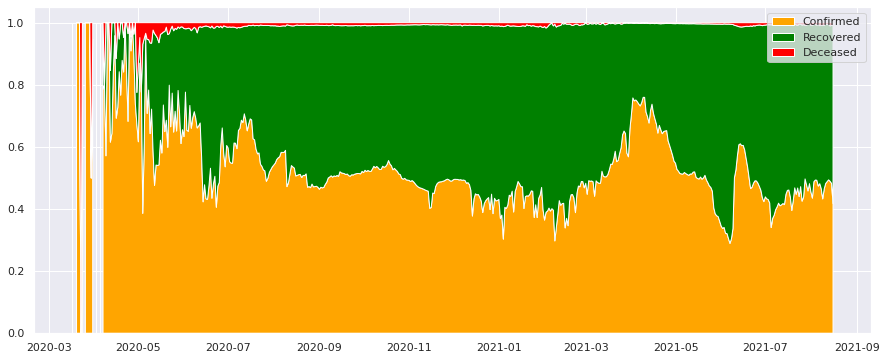

In [ ]:
plot_stack_area_by_state('wb');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


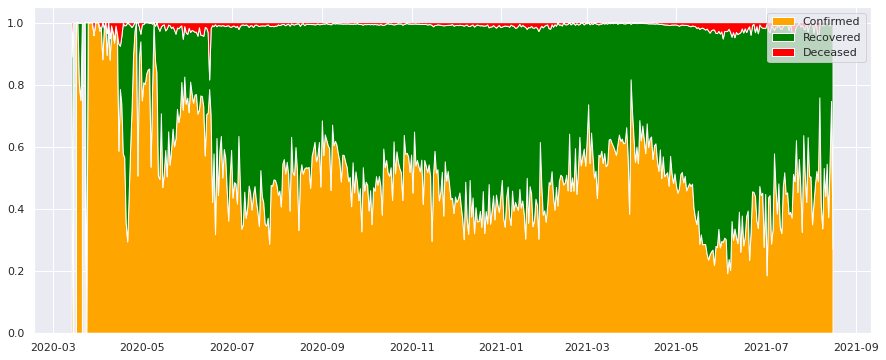

In [ ]:
plot_stack_area_by_state('dl');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


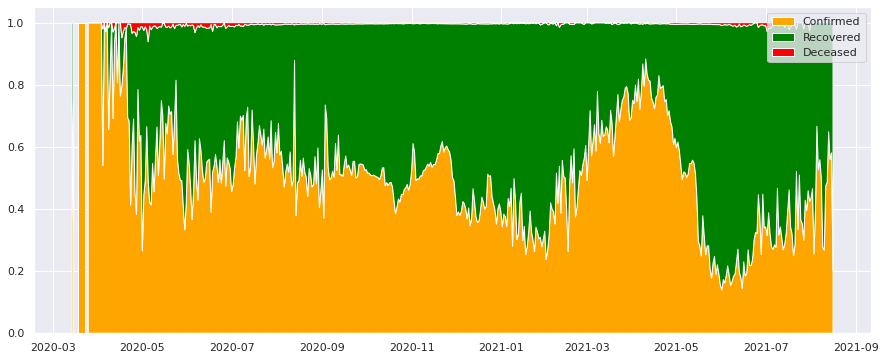

In [ ]:
plot_stack_area_by_state('rj');

# Plotting Relationship between Data

## Scatter Plot

In [ ]:
t = sns.load_dataset('tips')

In [ ]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


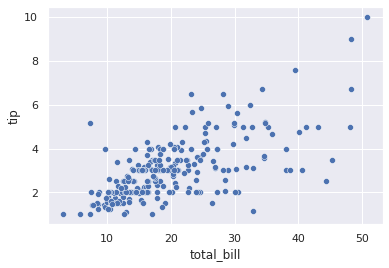

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', data= t);
#There are outliers,but it shows as total bill increases, tip increases

In [ ]:
t['tip_fraction'] = t['tip']/t['total_bill']

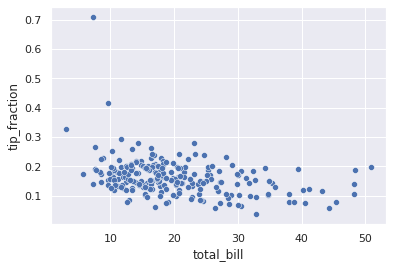

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip_fraction', data= t);

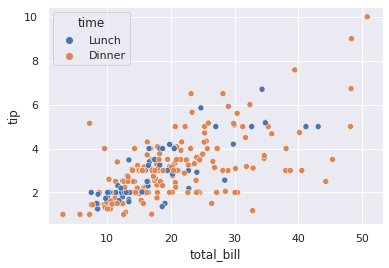

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'time', data= t);

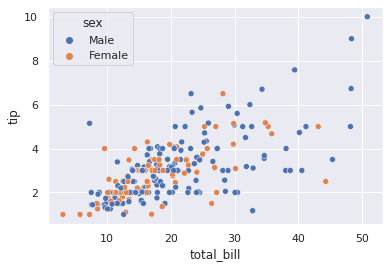

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'sex', data= t);

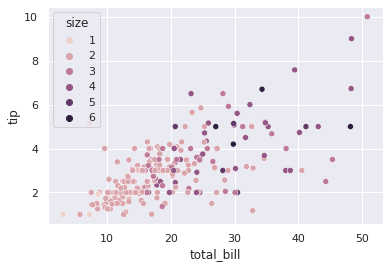

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'size', data= t);
#for size, colormap is automamtically changed by sns, as it contains a range of numbers

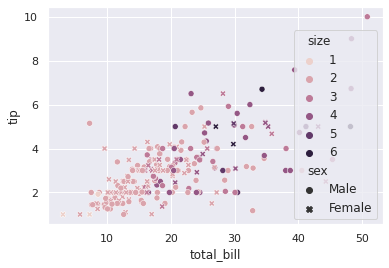

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'size', data= t, style = 'sex');

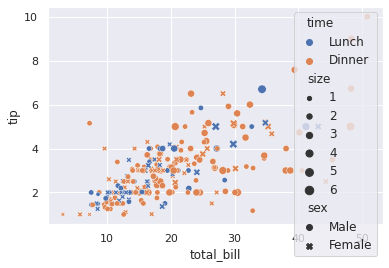

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'time', data= t, style = 'sex', size= 'size');

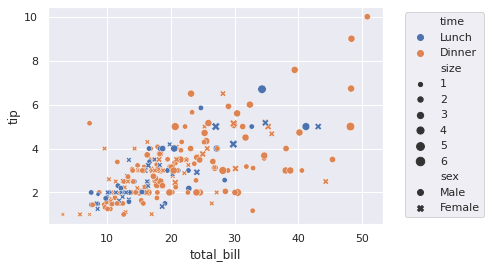

In [ ]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'time', data= t, style = 'sex', size= 'size');
plt.legend(bbox_to_anchor= (1.05, 1))

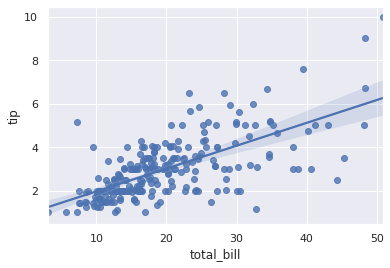

In [ ]:
sns.regplot(x= 'total_bill', y= 'tip', data= t);
#Regression plot

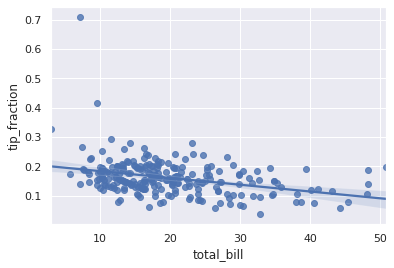

In [ ]:
sns.regplot(x= 'total_bill', y= 'tip_fraction', data= t);

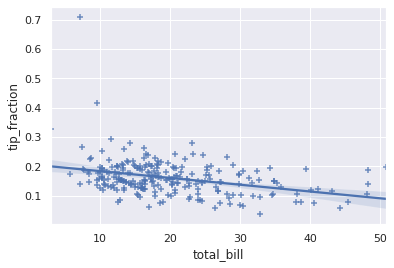

In [ ]:
sns.regplot(x= 'total_bill', y= 'tip_fraction', data= t, marker= '+');

In [ ]:
d = sns.load_dataset('diamonds')

In [ ]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


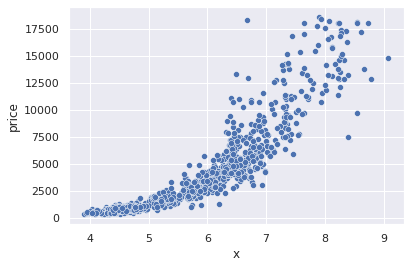

In [ ]:
sns.scatterplot('x', 'price', data = d.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


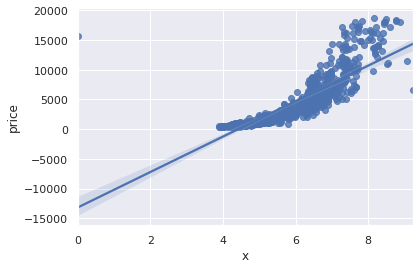

In [ ]:
sns.regplot('x', 'price', data = d.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


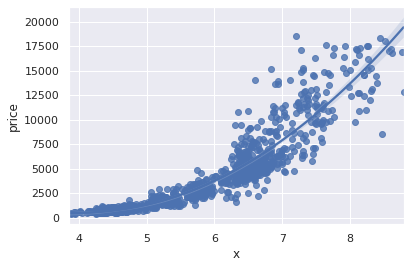

In [ ]:
sns.regplot('x', 'price', data = d.sample(1000), order= 2);

## Bar Plots

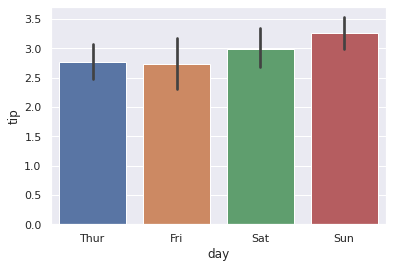

In [ ]:
sns.barplot(x= 'day', y= 'tip', data= t);

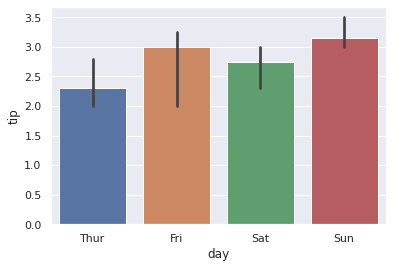

In [ ]:
sns.barplot(x= 'day', y= 'tip', data= t, estimator=np.median);

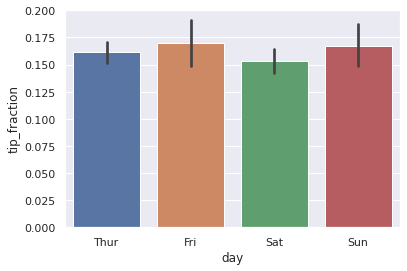

In [ ]:
sns.barplot(x= 'day', y= 'tip_fraction', data= t);

In [ ]:
def my_estimator(v):
    return np.quantile(v, 0.25)

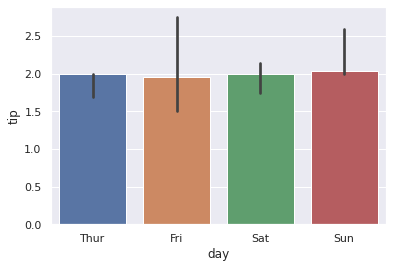

In [ ]:
sns.barplot(x= 'day', y= 'tip', data= t, estimator= my_estimator);

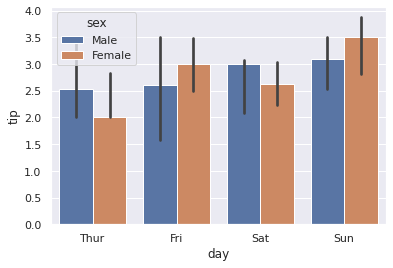

In [ ]:
sns.barplot(x= 'day', y= 'tip', hue= "sex", data= t, estimator=np.median);

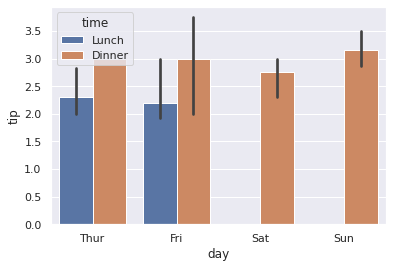

In [ ]:
sns.barplot(x= 'day', y= 'tip', hue= "time", data= t, estimator=np.median);

### Continuous vs Continuous Bar Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


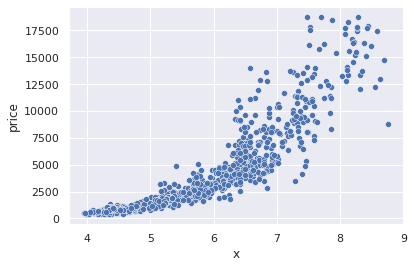

In [ ]:
sns.scatterplot('x', 'price', data= d.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


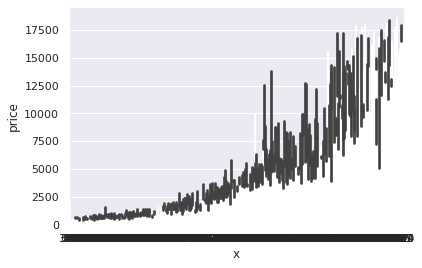

In [ ]:
sns.barplot('x', 'price', data= d.sample(1000));

In [ ]:
#qunatizing the x-aixs
d['x_q'] = pd.cut(d['x'], bins= 15);

In [ ]:
d['x_q'].unique()

[(3.58, 4.296], (4.296, 5.012], (5.012, 5.728], (6.444, 7.16], (5.728, 6.444], ..., (-0.0107, 0.716], (7.876, 8.592], (8.592, 9.308], (9.308, 10.024], (10.024, 10.74]]
Length: 11
Categories (11, interval[float64]): [(-0.0107, 0.716] < (3.58, 4.296] < (4.296, 5.012] < (5.012, 5.728] <
                                     ... < (7.876, 8.592] < (8.592, 9.308] <
                                     (9.308, 10.024] < (10.024, 10.74]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


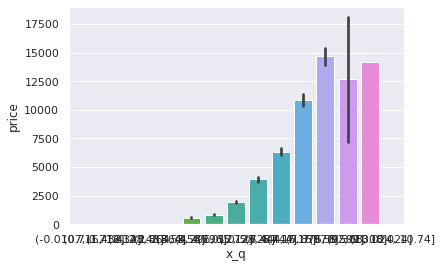

In [ ]:
sns.barplot('x_q', 'price', data= d.sample(1000));

In [ ]:
d['x_q'] = pd.cut(d['x'], bins= 15, labels= False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


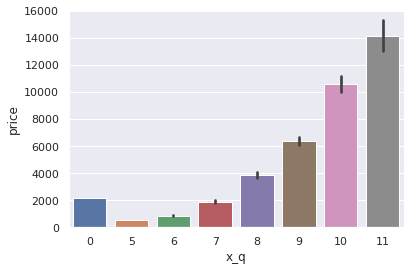

In [ ]:
sns.barplot('x_q', 'price', data= d.sample(1000));

## Line Plot

In [ ]:
f = sns.load_dataset('fmri')

In [ ]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


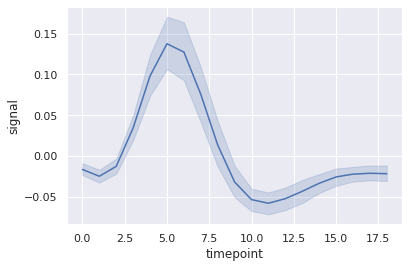

In [ ]:
sns.lineplot('timepoint', 'signal', data= f)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


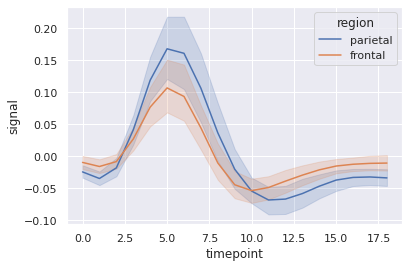

In [ ]:
sns.lineplot('timepoint', 'signal', hue= 'region', data= f);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


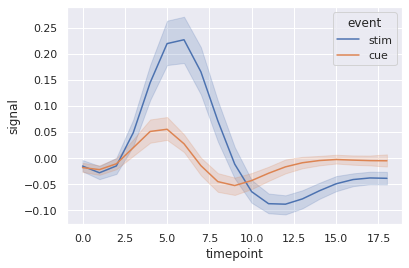

In [ ]:
sns.lineplot('timepoint', 'signal', hue= 'event', data= f);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


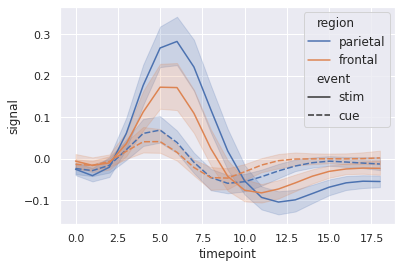

In [ ]:
sns.lineplot('timepoint', 'signal', hue= 'region', style= 'event', data= f);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


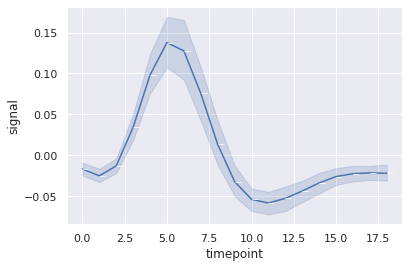

In [ ]:
sns.lineplot('timepoint', 'signal', data= f, marker= True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


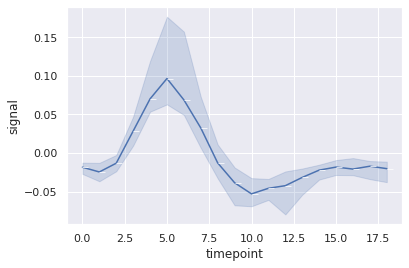

In [ ]:
sns.lineplot('timepoint', 'signal', data= f, marker= True, estimator= np.median);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


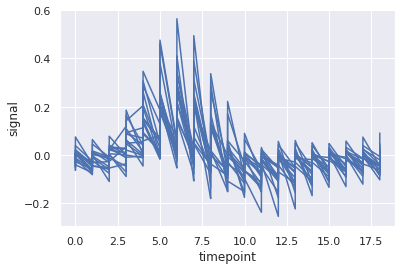

In [ ]:
sns.lineplot('timepoint', 'signal', data= f, units= 'subject', estimator= None)
#For units, we want them to plot indivivdually, so estimamtor should be none

#in this, all the regions and event are mixed, so we are not getting anything specific

In [ ]:
f_ = f[(f.region == 'parietal') & (f.event == 'cue')]

In [ ]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


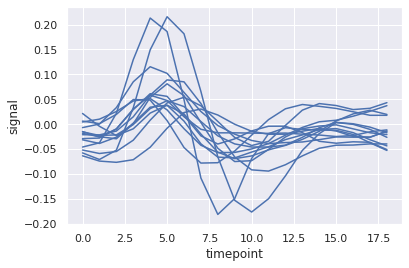

In [ ]:
sns.lineplot('timepoint', 'signal', data= f_, units= 'subject', estimator= None);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


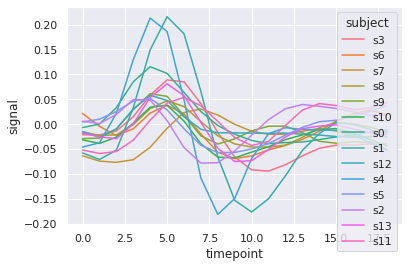

In [ ]:
sns.lineplot('timepoint', 'signal', data= f_, hue= 'subject', estimator= None);

In [ ]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])

In [ ]:
y = x * x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


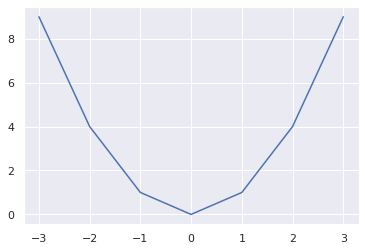

In [ ]:
sns.lineplot(x, y);
#lineplot works with both numpy and pandas array

In [ ]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)       
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)
df = df[df['status'] == 'Confirmed']          
df.drop(['tt', 'status', 'dateymd'], axis= 1, inplace= True)                               
df = df.apply(pd.to_numeric)                  
df.reset_index(inplace = True) 

In [ ]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,0,2,1,0


### Melt Table

date | state | confirmed

2020-03-14| an | 0

2020-03-14 | ap | 1

In [ ]:
df_ = pd.melt(df, id_vars= 'date', value_vars= list(df.columns).remove("date"), var_name= 'state', value_name= 'confirmed')

In [ ]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


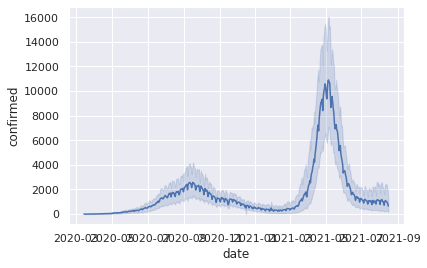

In [ ]:
sns.lineplot('date', 'confirmed', data = df_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


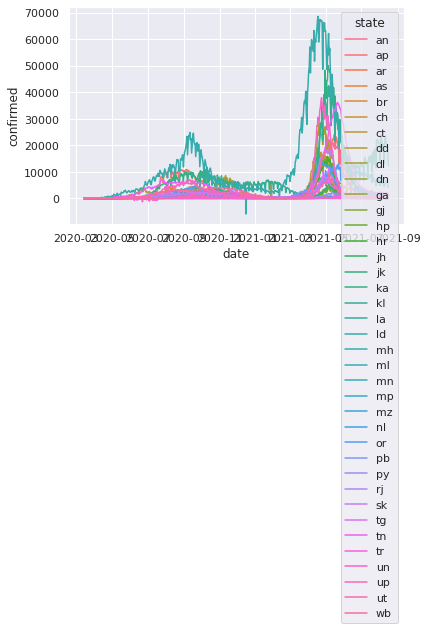

In [ ]:
sns.lineplot('date', 'confirmed', hue= 'state', data = df_)

In [ ]:
states = ['mh', 'kl', 'tn', 'dl', 'wb', 'ka', 'rj']

In [ ]:
df_ =  df_[df_.state.isin(states)]

In [ ]:
df_.head()

,date,state,confirmed
4168,2020-03-14,dl,7
4169,2020-03-15,dl,0
4170,2020-03-16,dl,0
4171,2020-03-17,dl,1
4172,2020-03-18,dl,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


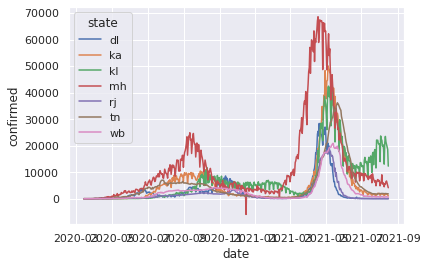

In [ ]:
sns.lineplot('date', 'confirmed',hue= 'state', data = df_);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


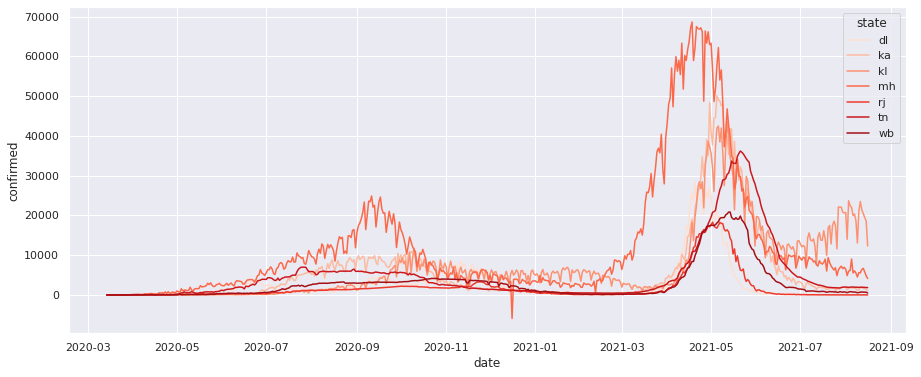

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed',hue= 'state', data = df_, palette= 'Reds');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


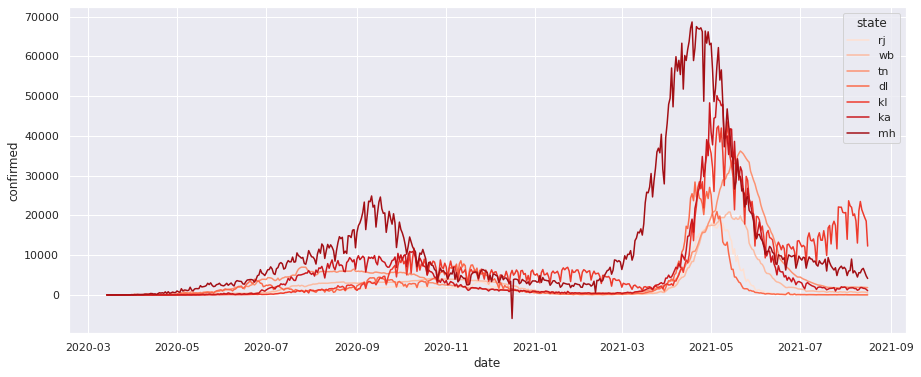

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed',hue= 'state', data = df_, palette= 'Reds', hue_order= [ 'rj', 'wb', 'tn', 'dl', 'kl', 'ka', 'mh']);

In [ ]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)       
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)
df = df[df['status'] == 'Confirmed']          
df.drop(['tt', 'status', 'dateymd'], axis= 1, inplace= True)                               
df = df.apply(pd.to_numeric) 
df = df.rolling(7).mean()            
df.reset_index(inplace = True) 

In [ ]:
df_ = pd.melt(df, id_vars= 'date', value_vars= list(df.columns).remove("date"), var_name= 'state', value_name= 'confirmed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


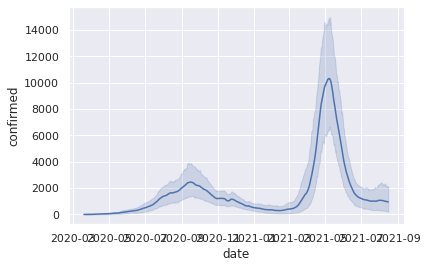

In [ ]:
sns.lineplot('date', 'confirmed', data = df_)
#coz of rolling, we are getting smooth curve

In [ ]:
states = [ 'rj', 'wb', 'tn', 'dl', 'kl', 'ka', 'mh']

In [ ]:
df_ =  df_[df_.state.isin(states)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


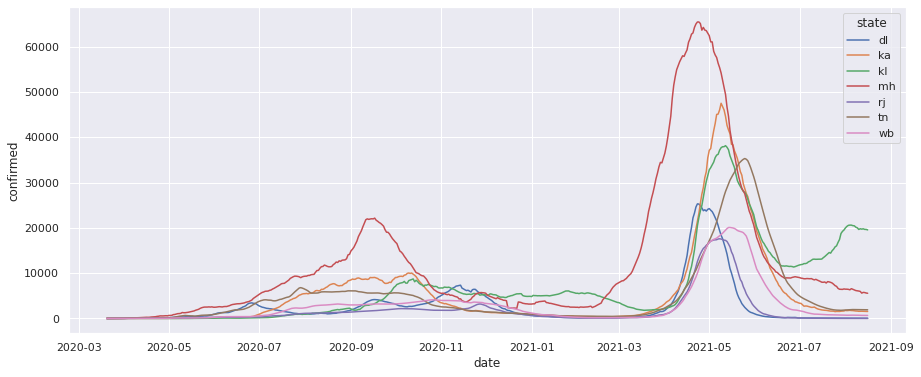

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed',hue= 'state', data = df_);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


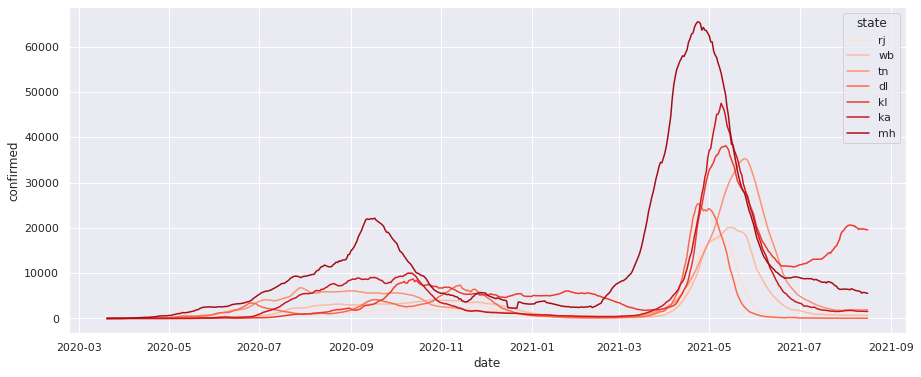

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed',hue= 'state', data = df_, palette= 'Reds', hue_order= [ 'rj', 'wb', 'tn', 'dl', 'kl', 'ka', 'mh']);

## Heatmap

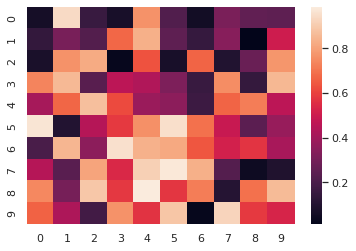

In [ ]:
x= np.random.rand(10, 10)
sns.heatmap(x)

In [ ]:
fl = sns.load_dataset('flights')

In [ ]:
fl.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year  |  Jan  |  Feb  | ... | Dec

1949  |  112  |  118  | ... | 118

In [ ]:
fl_ = fl.pivot(index= 'year', columns= 'month', values= 'passengers')

In [ ]:
fl_.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


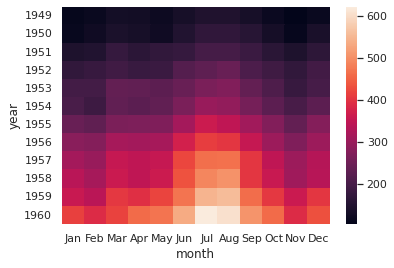

In [ ]:
sns.heatmap(fl_)

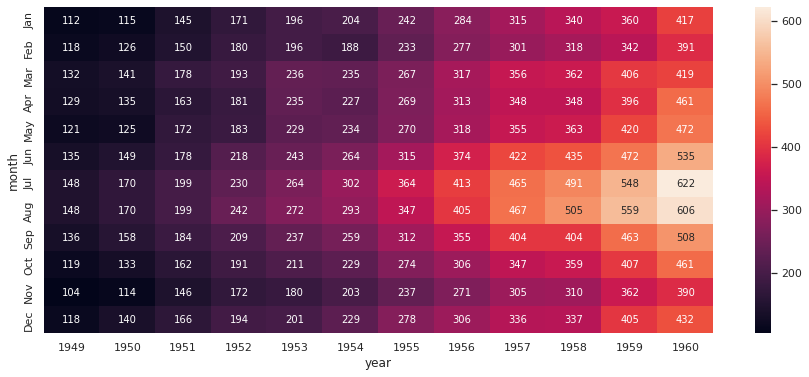

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot= True, fmt="d");
#Annotation true with format as "day"

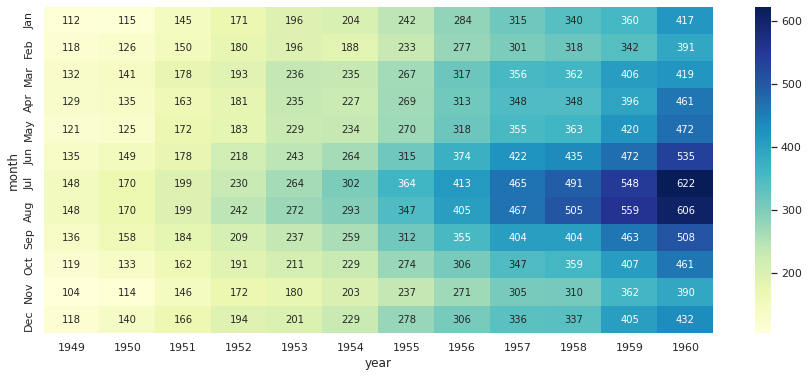

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot= True, fmt="d", cmap= "YlGnBu");

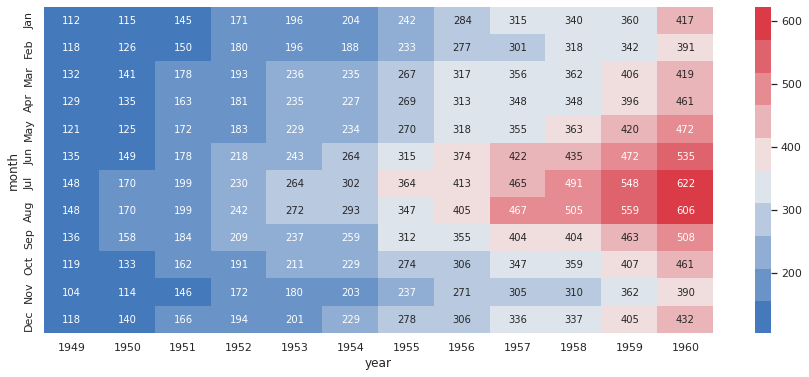

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot= True, fmt="d", cmap= sns.diverging_palette(250, 10, n= 10));
#give a range for colors(here, 250-10)

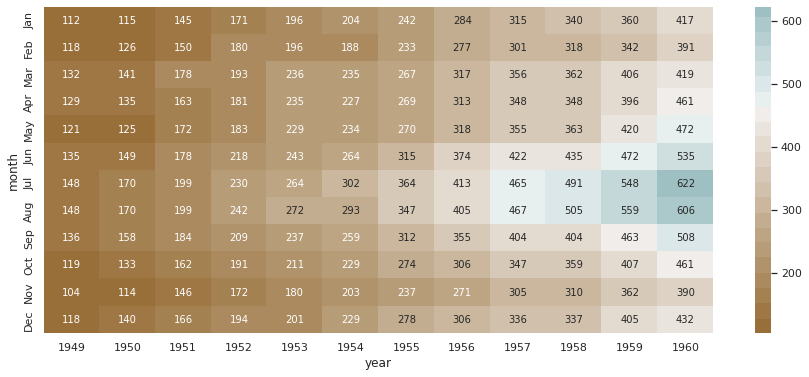

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot= True, fmt="d", cmap= sns.diverging_palette(50, 200, n= 30), center= fl_.loc[1957, 'Jul']);
#it will set center color fixed for a particular element